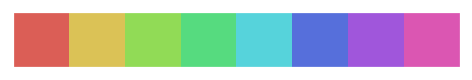

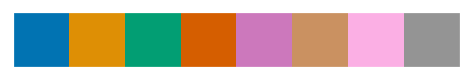

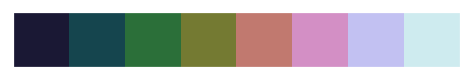

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(style="whi")
#Examples for colorschemes we could use
sns.palplot(sns.color_palette("hls", 8))
sns.palplot(sns.color_palette("colorblind", 8))
sns.palplot(sns.color_palette("cubehelix", 8))
#Colorscheme we are currently using (_r means it is reversed)
sns.set_palette("cubehelix_r")

In [3]:
# split data into 8 different arrays
Diving_10m = pd.read_excel('results_with_wiki_count.xlsx', sheet_name = 'Diving_10m')
Archery = pd.read_excel('results_with_wiki_count.xlsx', sheet_name = 'Archery')
Fencing_Epee = pd.read_excel('results_with_wiki_count.xlsx', sheet_name = 'Fencing_Epee')
Modern_Pentathlon = pd.read_excel('results_with_wiki_count.xlsx', sheet_name = 'Modern_Pentathlon')
Pole_Vault = pd.read_excel('results_with_wiki_count.xlsx', sheet_name = 'Pole_Vault')
Swimming_100m_Freestyle = pd.read_excel('results_with_wiki_count.xlsx', sheet_name = 'Swimming_100m_Freestyle')
Cycling_Road = pd.read_excel('results_with_wiki_count.xlsx', sheet_name = 'Cycling_Road')
Athletes_100m = pd.read_excel('results_with_wiki_count.xlsx', sheet_name = 'Athletes_100m')

In [4]:
def plot_means(y):
    x = range(len(y))
    labels = ["Women", "Men"]
    width = 1/2
    plt.bar(x, y, width)
    plt.xticks(x, labels)

In [5]:
def plot_median(y):
    x = range(len(y))
    labels = ["Women", "Men"]
    width = 1/2
    plt.bar(x, y, width)
    plt.xticks(x, labels)

In [6]:
# t-test for male and female participants in athletics_100_m finals
#stats.ttest_ind(males, females)

def ttest(sportart,kategorie):
    '''conducts a t test for given competition
    
    Args:
        competition: olympic sports competition to evaluate
    
    Returns:
        statistic, pvalue : The calculated t-statistic and the two-tailed p-value.
    '''
    kat={'words':4,'edits':5,'links':6}
    k=kat[kategorie]
    
    # create subgroups of male and female atheletes
    men = sportart.loc[sportart['Gender'] == 'Men']
    women = sportart.loc[sportart['Gender'] == 'Women']
    
    print(kategorie)

    y_mean = [women['Wiki_Count'].mean(), men['Wiki_Count'].mean()]
    y_median = [women['Wiki_Count'].median(), women['Wiki_Count'].median()]
    mean_women = y_mean[0]
    mean_men = y_mean[1]
    
    print('%d women, mean: %f, median: %f' % (len(women), mean_women, y_median[0]) )
    print('%d men, mean: %f, median: %f' % (len(men), mean_men, y_median[1]) )  
    
    plt.subplot(1, 2, 1)
    plot_means([mean_women, mean_men])
    plt.subplot(1, 2, 2)
    plot_median([y_median[0], y_median[1]])

    plt.show()
    
    # conduct t test
    
    return stats.ttest_ind(men['Wiki_Count'], women['Wiki_Count'])

words
80 women, mean: 334.900000, median: 124.500000
84 men, mean: 504.595238, median: 124.500000


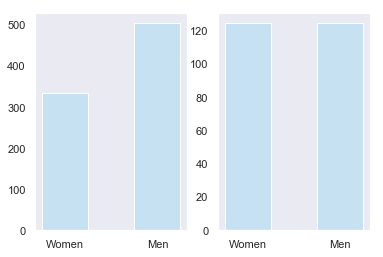

Ttest_indResult(statistic=1.1493082703811042, pvalue=0.2521228742730568)


In [7]:
# words,edits,links
print(ttest(Athletes_100m,'words')) 

In [8]:
# Put all data in one dataframe
alldata = pd.DataFrame(Diving_10m).append(Archery).append(Fencing_Epee).append(Modern_Pentathlon).append(Pole_Vault).append(Swimming_100m_Freestyle).append(Cycling_Road).append(Athletes_100m)

In [9]:
allmen = alldata.loc[alldata['Gender'] == 'Men']
allwomen = alldata.loc[alldata['Gender'] == 'Women']
withoutMen = alldata.loc[alldata['Gender'] != 'Men']
unassigned = withoutMen.loc[withoutMen['Gender'] != 'Women']

print('Women: ' + str(len(allwomen)) + ' Men: ' +str(len(allmen)) +' Unassigned: ' + str(len(unassigned)))

Women: 361 Men: 372 Unassigned: 0


In [10]:
#Extreme values on wordcount column
def extremes_per_sport(data, gender):
    #list of all sports disciplines to be used as indices in resulting data frame
    disciplines = data.Discipline.unique()
    #column names to be used in resulting data frame
    cols = ['Max', 'Min', 'Mean', 'Median']
    max = []
    min = []
    mean = []
    median = []
    all_data_for_spec_gender = data.loc[data['Gender'] == gender]
    for discipline in disciplines:
        all_for_discipline = all_data_for_spec_gender.loc[all_data_for_spec_gender['Discipline'] == discipline]
        max.append(all_for_discipline.Wiki_Count.max())
        min.append(all_for_discipline.Wiki_Count.min())
        mean.append(all_for_discipline.Wiki_Count.mean())
        median.append(all_for_discipline.Wiki_Count.median())
    return pd.DataFrame({'Max' :np.asarray(max),
                         'Min' :np.asarray(min),
                         'Mean':np.asarray(mean),
                         'Median':np.asarray(median)}, index=disciplines)

In [11]:
def plot(data):
    # labels for y axis
    labels = data.Discipline.unique()
    # amount of ticks on y axis
    ind = np.arange(len(labels))
    extremes_men = extremes_per_sport(data, 'Men')
    extremes_women = extremes_per_sport(data, 'Women')
    
    width = 0.35
    plt.figure(1)
    fig, ax = plt.subplots(2,2,figsize=(20,15))
    ax[0,0].bar(ind + width/2, extremes_women.Max, width, label='Women')
    ax[0,0].bar(ind - width/2, extremes_men.Max, width, label='Men')
    
    ax[0,0].legend()
    ax[0,0].set_xticks(ind)
    ax[0,0].set_xticklabels(labels)
    ax[0,0].set_ylabel('Wordcount')
    ax[0,0].set_title('Max Wordcount')
    
    ax[0,1].bar(ind + width/2, extremes_women.Min, width, label='Women')
    ax[0,1].bar(ind - width/2, extremes_men.Min, width, label='Men')
    
    ax[0,1].legend()
    
    ax[0,1].set_xticks(ind)
    ax[0,1].set_xticklabels(labels)
    ax[0,1].set_ylabel('Wordcount')
    ax[0,1].set_title('Min Wordcount')
    
    ax[1,0].bar(ind + width/2, extremes_women.Mean, width, label='Women')
    ax[1,0].bar(ind - width/2, extremes_men.Mean, width, label='Men')
    
    ax[1,0].legend()
    
    ax[1,0].set_xticks(ind)
    ax[1,0].set_xticklabels(labels)
    ax[1,0].set_ylabel('Wordcount')
    ax[1,0].set_title('Mean Wordcount')
    
    ax[1,1].bar(ind + width/2, extremes_women.Median, width, label='Women')
    ax[1,1].bar(ind - width/2, extremes_men.Median, width, label='Men')
    
    ax[1,1].legend()
    
    ax[1,1].set_xticks(ind)
    ax[1,1].set_xticklabels(labels)
    ax[1,1].set_ylabel('Wordcount')
    ax[1,1].set_title('Median Wordcount')
 
    plt.show()

<Figure size 432x288 with 0 Axes>

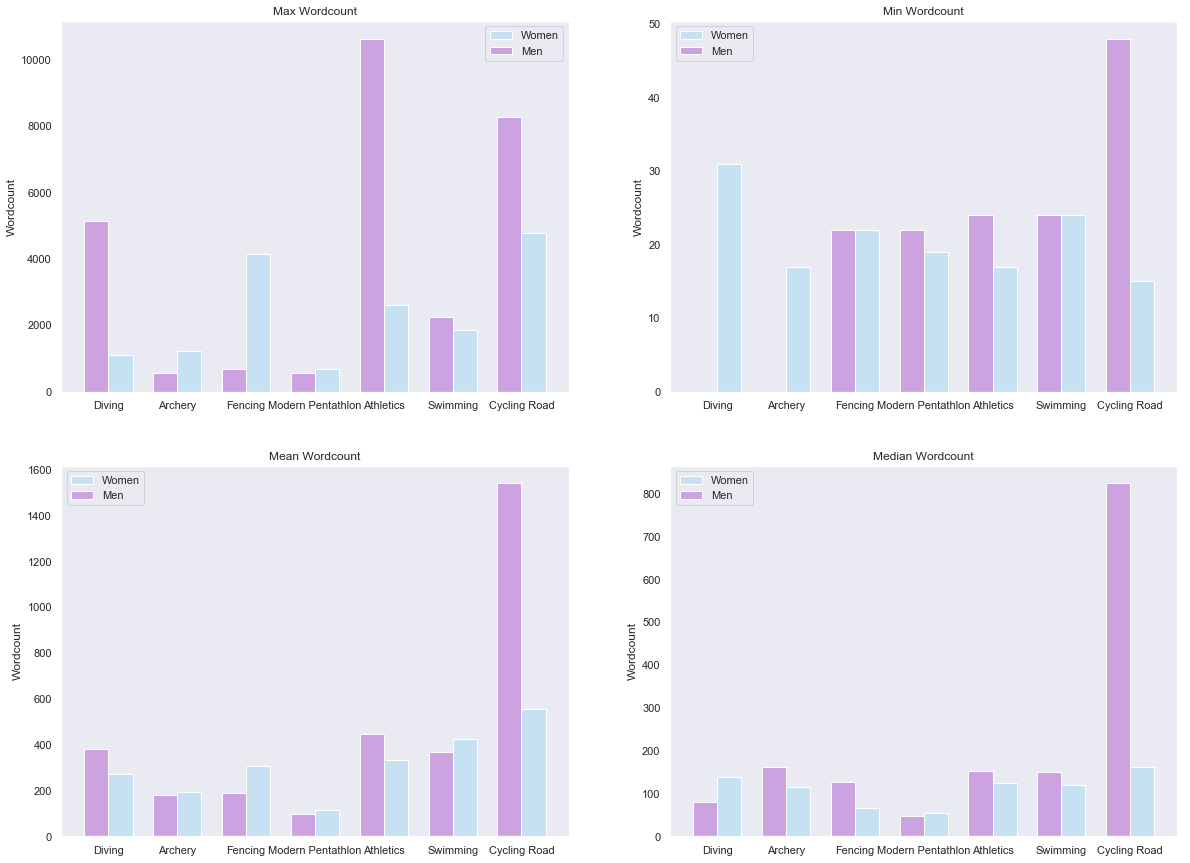

In [12]:
plot(alldata)

In [13]:
# extremes_per_sport(alldata, 'Men')

In [14]:
# extremes_per_sport(alldata, 'Women')

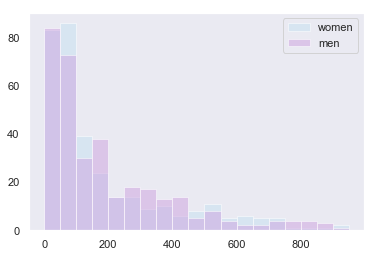

In [15]:
#histogram of all data
men = alldata.loc[alldata['Gender'] == 'Men'].Wiki_Count
women = alldata.loc[alldata['Gender'] == 'Women'].Wiki_Count

bins = range(0, 1000, 50)

plt.hist(women, bins, alpha=0.5, label='women')
plt.hist(men, bins, alpha=0.5, label='men')

plt.legend()
plt.show()

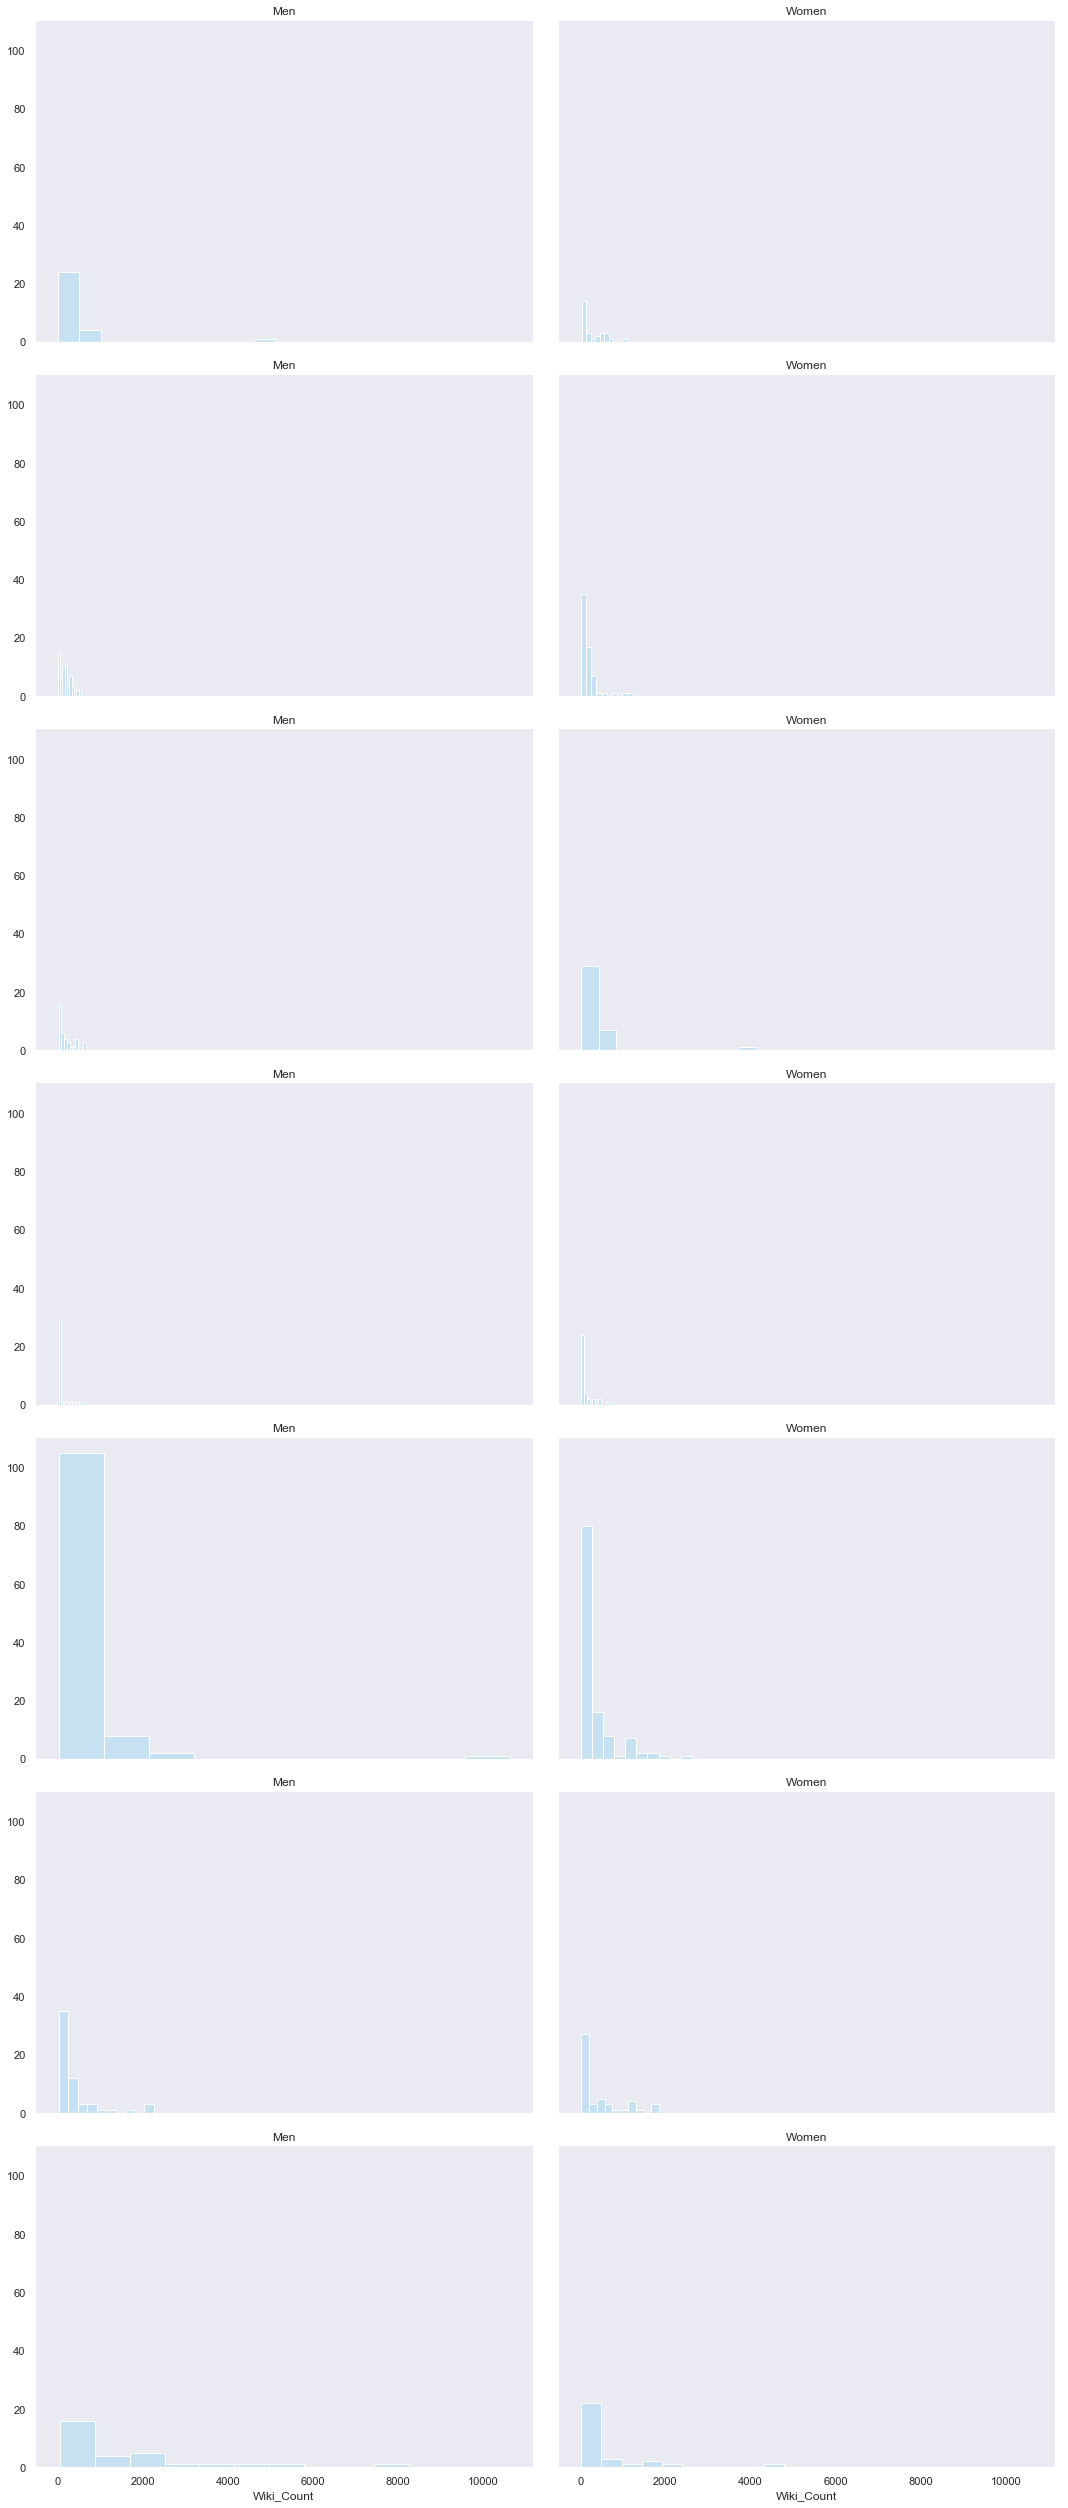

In [16]:
#histograms using fancy seaborn but the result is kind of strange ...
g = sns.FacetGrid(alldata, col="Gender", row="Discipline", height=5, aspect=1.5)
g = (g.map(plt.hist,"Wiki_Count").set_titles("{col_name}"))

<Figure size 432x288 with 0 Axes>

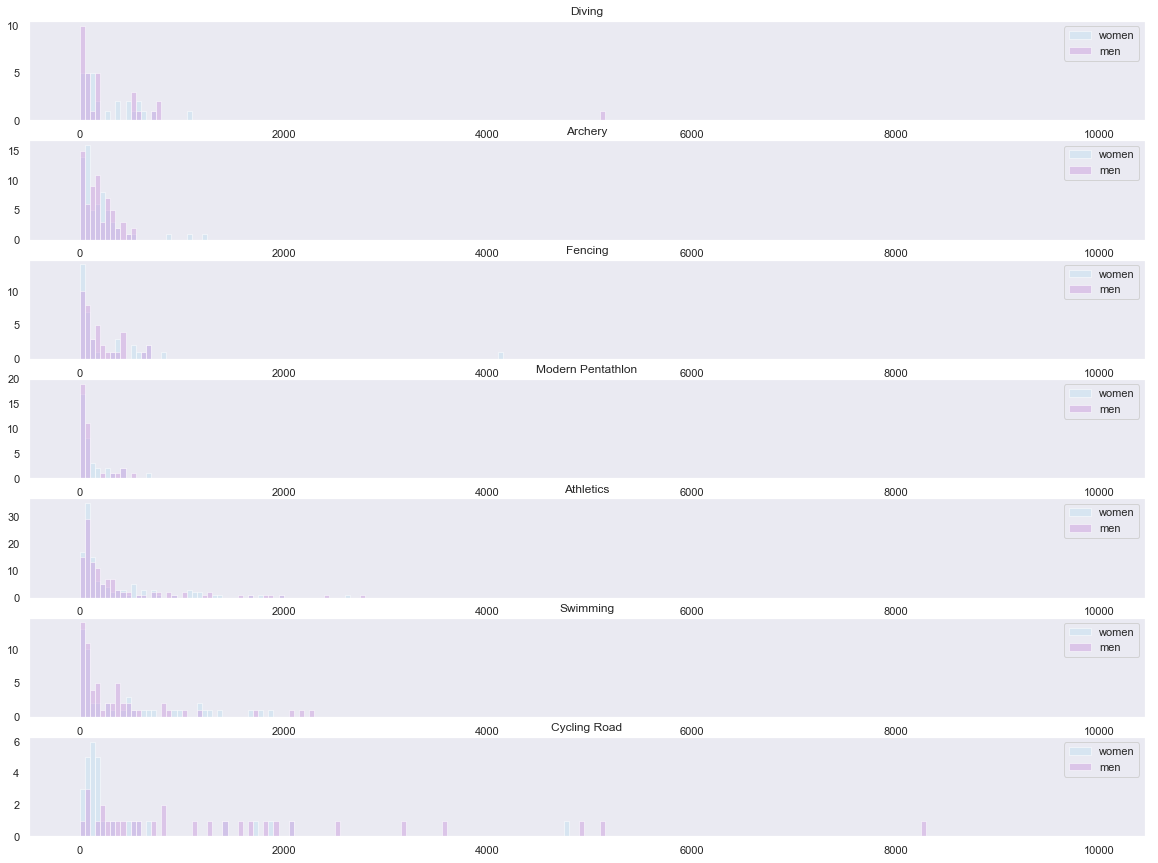

In [17]:
#histograms using normal matplotlib
men = alldata.loc[alldata['Gender'] == 'Men']
women = alldata.loc[alldata['Gender'] == 'Women']

bins = range(0, 10000, 50)

all_disciplines = np.asarray(alldata.Discipline.unique())
amout_of_graphs = len(all_disciplines)
plt.figure(1)
fig, ax = plt.subplots(amout_of_graphs,1, figsize=(20,15))
for row_number in range(0, amout_of_graphs):
    ax[row_number].hist(women.loc[women['Discipline'] == all_disciplines[row_number]].Wiki_Count, bins, alpha=0.5, label='women')
    ax[row_number].hist(men.loc[men['Discipline'] == all_disciplines[row_number]].Wiki_Count, bins, alpha=0.5, label='men')
    ax[row_number].legend()
    ax[row_number].set_title(all_disciplines[row_number])

In [18]:
#all ttests
# stats.ttest_ind(men['Wiki_Count'], women['Wiki_Count'])
men = alldata.loc[alldata['Gender'] == 'Men']
women = alldata.loc[alldata['Gender'] == 'Women']
all_disciplines = np.asarray(alldata.Discipline.unique())
amout_of_disciplines = len(all_disciplines)
ttest_results = []
pvalues = []
for discipline in all_disciplines:
    ttest_result = stats.ttest_ind(men.loc[men['Discipline'] == discipline].Wiki_Count,
                                         women.loc[women['Discipline'] == discipline].Wiki_Count)
    ttest_results.append(ttest_result.statistic)
    pvalues.append(ttest_result.pvalue)

pd.DataFrame({'Discipline' :np.asarray(all_disciplines),
              'Ttest Statistic' :np.asarray(ttest_results[0]),
              'P Value': np.asarray(pvalues)})

,Discipline,Ttest Statistic,P Value
0,Diving,0.602637,0.549227
1,Archery,0.602637,0.779959
2,Fencing,0.602637,0.316736
3,Modern Pentathlon,0.602637,0.621732
4,Athletics,0.602637,0.291977
5,Swimming,0.602637,0.570317
6,Cycling Road,0.602637,0.013395


In [19]:
#Number of ppl of specified gender per sport
#This method is mostly for us
def gender_per_sport(data):
    disciplines = data.Discipline.unique()
    female = []
    male = []
    equal_genders = []
    allwomen = data.loc[data['Gender'] == 'Women']
    allmen = data.loc[data['Gender'] == 'Men']
    for discipline in disciplines:
        amount_of_women = len(allwomen.loc[allwomen['Discipline'] == discipline])
        amount_of_men = len(allmen.loc[allmen['Discipline'] == discipline])
        female.append(amount_of_women)
        male.append(amount_of_men)
        if amount_of_men == amount_of_women:
            equal_genders.append('true')
        else:
            equal_genders.append('false')
    return pd.DataFrame({'f':np.asarray(female),
                        'm': np.asarray(male),
                        'equal': np.asarray(equal_genders)}, index=disciplines)

In [20]:
# gender_per_sport(alldata)
#Male and female athletes per sport, where there are equal numbers of participants

C:\Users\Josefine\AppData\Local\conda\conda\envs\ds_env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


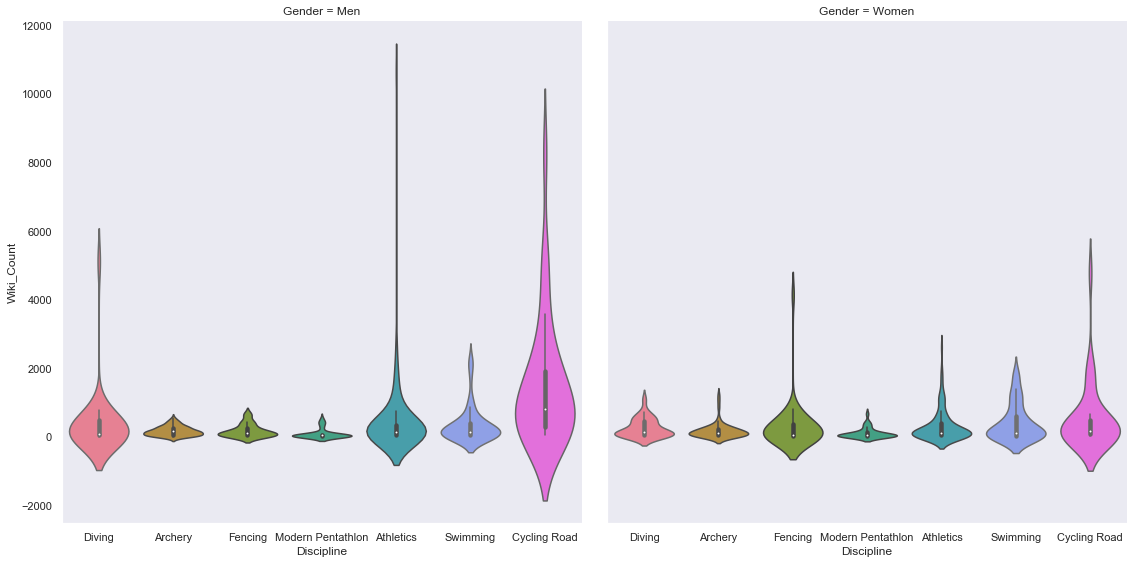

In [21]:
g = sns.FacetGrid(alldata, col="Gender", height=8, hue="Discipline")
g.map(sns.violinplot,"Discipline", "Wiki_Count", order=alldata.Discipline.unique())
#why smaller than 0??

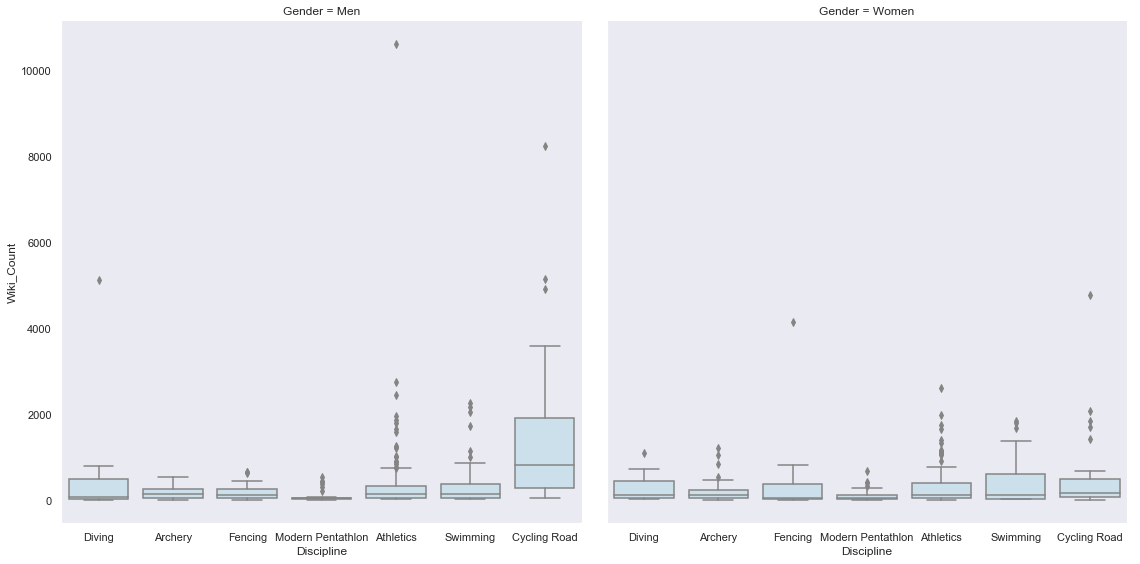

In [22]:
g = sns.FacetGrid(alldata, col="Gender", height=8)
g.map(sns.boxplot,"Discipline", "Wiki_Count", order=alldata.Discipline.unique())

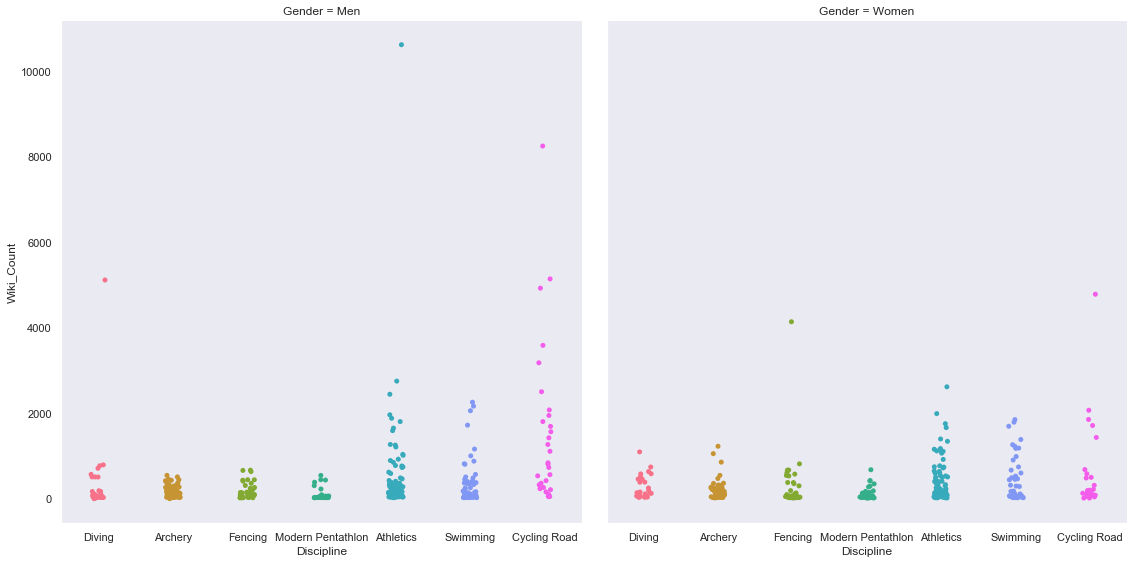

In [23]:
g = sns.FacetGrid(alldata, col="Gender",  height=8, aspect=1, hue="Discipline")
g.map(sns.stripplot,"Discipline", "Wiki_Count", order = alldata.Discipline.unique())